In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Relational Classification Plots on Synthetic Networks</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, '_mixed_effects')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,cp00_g,cp01_g,cp10_g,cp11_g,MSEp0,MSEp1,MSEcp00,MSEcp11,MSEcpDiff,MSE
0,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.70,...,0.000107,0.999893,0.999893,0.000107,0.000321,0.000321,1.208083e-08,1.208083e-08,0.0,0.000321
1,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.70,...,0.000107,0.999893,0.999893,0.000107,0.000386,0.000386,1.100766e-08,1.100766e-08,0.0,0.000386
2,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.05,...,0.000107,0.999893,0.999893,0.000107,0.007139,0.007139,2.257425e-03,2.257425e-03,0.0,0.011654
3,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.05,...,0.000107,0.999893,0.999893,0.000107,0.014770,0.014770,3.892927e-03,3.892927e-03,0.0,0.022556
4,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.30,...,0.000107,0.999893,0.999893,0.000107,0.002694,0.002694,1.029004e-06,1.029004e-06,0.0,0.002696


<h2>Plotting setup</h2>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head() 

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,cp\_{00 g},cp\_{01 g},cp\_{10 g},cp\_{11 g},MSEp0,MSEp1,MSEcp00,MSEcp11,MSEcpDiff,MSE
0,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.70,...,0.000107,0.999893,0.999893,0.000107,0.000321,0.000321,1.208083e-08,1.208083e-08,0.0,0.000321
1,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.70,...,0.000107,0.999893,0.999893,0.000107,0.000386,0.000386,1.100766e-08,1.100766e-08,0.0,0.000386
2,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.05,...,0.000107,0.999893,0.999893,0.000107,0.007139,0.007139,2.257425e-03,2.257425e-03,0.0,0.011654
3,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.05,...,0.000107,0.999893,0.999893,0.000107,0.014770,0.014770,3.892927e-03,3.892927e-03,0.0,0.022556
4,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.30,...,0.000107,0.999893,0.999893,0.000107,0.002694,0.002694,1.029004e-06,1.029004e-06,0.0,0.002696


<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [6]:
df_rq1 = df_results.query("kind=='BAH' & sampling=='nodes'")
df_rq1.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,cp\_{00 g},cp\_{01 g},cp\_{10 g},cp\_{11 g},MSEp0,MSEp1,MSEcp00,MSEcp11,MSEcpDiff,MSE
0,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.70,...,0.000107,0.999893,0.999893,0.000107,0.000321,0.000321,1.208083e-08,1.208083e-08,0.0,0.000321
1,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.70,...,0.000107,0.999893,0.999893,0.000107,0.000386,0.000386,1.100766e-08,1.100766e-08,0.0,0.000386
2,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.05,...,0.000107,0.999893,0.999893,0.000107,0.007139,0.007139,2.257425e-03,2.257425e-03,0.0,0.011654
3,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.05,...,0.000107,0.999893,0.999893,0.000107,0.014770,0.014770,3.892927e-03,3.892927e-03,0.0,0.022556
4,BAH,500,20,0.077592,0.5,0.0,5.0,5.0,nodes,0.30,...,0.000107,0.999893,0.999893,0.000107,0.002694,0.002694,1.029004e-06,1.029004e-06,0.0,0.002696


<h3>Network structure vs. Global performance</h3>

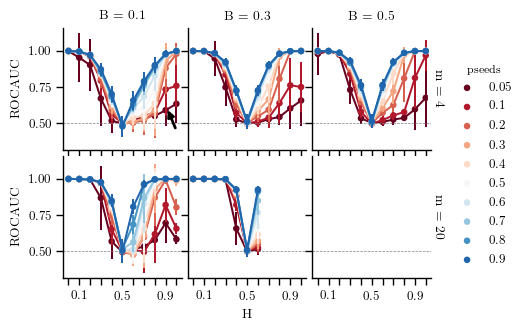

In [7]:
fn = None
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==2000"), columns, fn=fn)

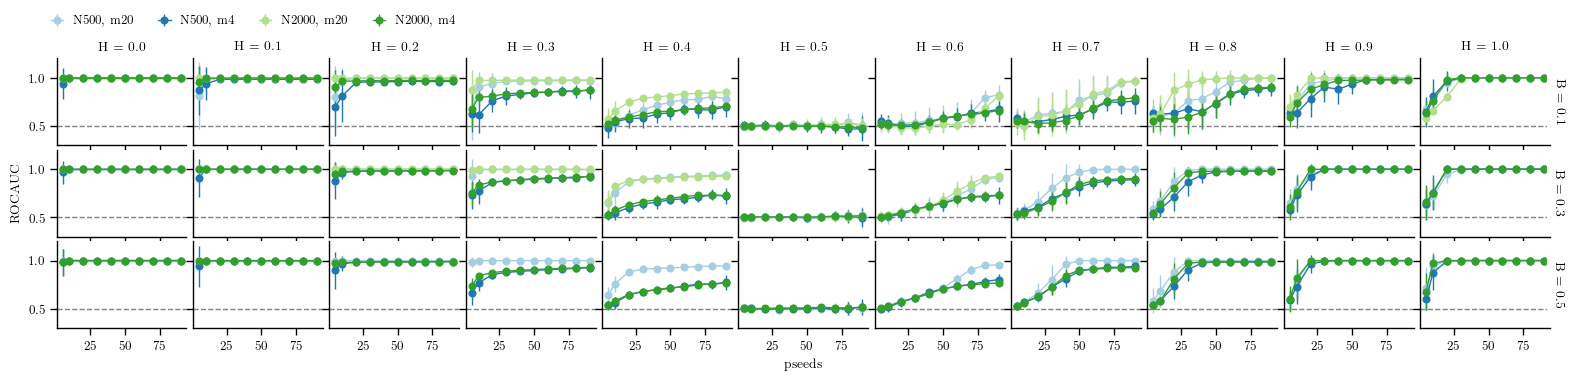

In [8]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [9]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"params.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

../results-batch/_mixed_effects/y_observed.pickle loaded!
../results-batch/_mixed_effects/fe_params.pickle loaded!
../results-batch/_mixed_effects/random_effects.pickle loaded!
../results-batch/_mixed_effects/mdf.pickle loaded!
../results-batch/_mixed_effects/params.pickle loaded!
../results-batch/_mixed_effects/X.pickle loaded!
../results-batch/_mixed_effects/Y.pickle loaded!
../results-batch/_mixed_effects/Z.pickle loaded!


In [10]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: rocauc   
No. Observations: 1800    Method:             REML     
No. Groups:       110     Scale:              0.0022   
Min. group size:  10      Likelihood:         2633.0201
Max. group size:  54      Converged:          Yes      
Mean group size:  16.4                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.774    0.018 43.841 0.000  0.739  0.808
N             0.000    0.000  8.441 0.000  0.000  0.000
density       0.604    0.047 12.853 0.000  0.512  0.696
B             0.089    0.007 12.566 0.000  0.075  0.102
Group Var     0.032    0.096                           
=======================================================

"""

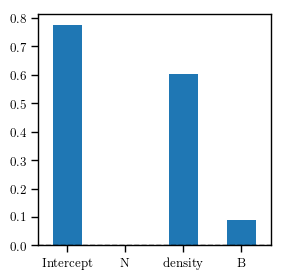

In [11]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

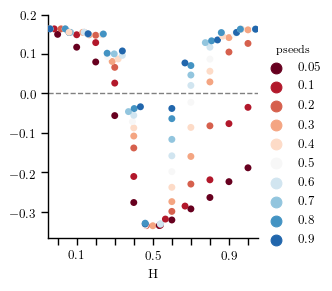

In [12]:
fn = None
viz.plot_random_effects(random_effects, params['group_vars'], fn)

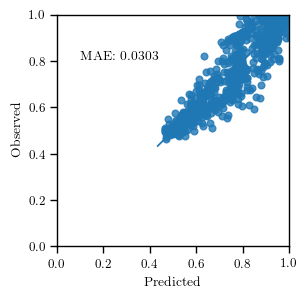

In [13]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

The MSE of LMM is 0.0020814869405568867
The RMSE of LMM is 0.0456233157558379
The MAE of LMM is 0.030312360761028324


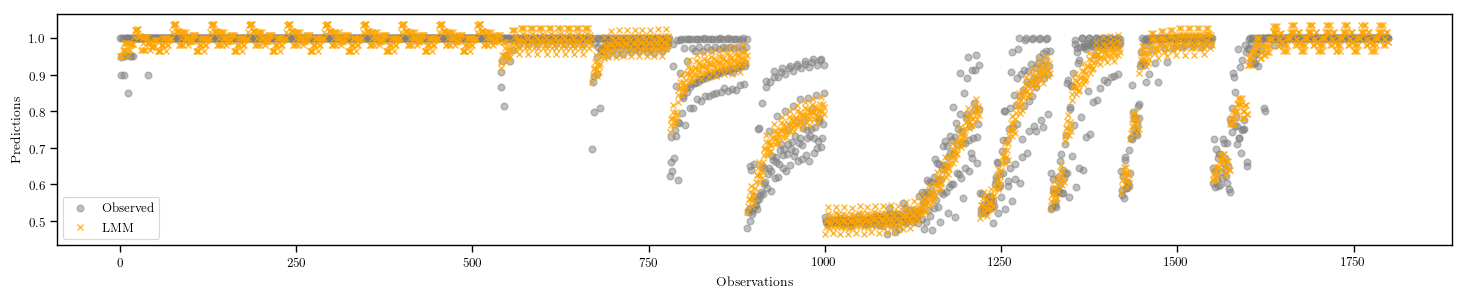

In [14]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Real World vs. Model</h3>

In [15]:
df_realworld = df_results.query("kind!='BAH' & sampling=='nodes'").copy()
df_realworld = prediction.setup(df_realworld)
df_realworld = df_realworld.append(prediction.predict_allrows(df_realworld, mdf, params), ignore_index=True)
df_realworld.sample(5)

,source,dataset,N,m,density,B,H,sampling,pseeds,ROCAUC,epoch
459,model,Caltech36,701,1,0.063028,0.33,0.56,nodes,0.5,0.617990,10
81,data,Caltech36,701,1,0.063028,0.33,0.56,nodes,0.8,0.655146,2
727,model,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.2,0.555505,8
572,model,Swarthmore42,1519,1,0.046600,0.49,0.53,nodes,0.7,0.678210,3
27,data,Caltech36,701,1,0.063028,0.33,0.56,nodes,0.2,0.436491,8


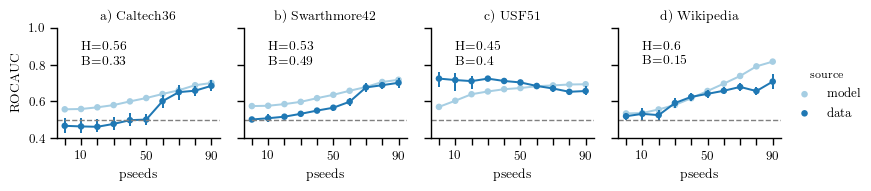

In [16]:
fn = None
viz.plot_model_vs_data(df_realworld, fn)

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [17]:
df_rq2 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8]")
df_rq2.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,cp\_{00 g},cp\_{01 g},cp\_{10 g},cp\_{11 g},MSEp0,MSEp1,MSEcp00,MSEcp11,MSEcpDiff,MSE
200,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.70,...,0.508761,0.491239,0.535733,0.464267,0.000428,0.000428,0.000053,0.000252,-0.000199,0.000733
201,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.70,...,0.508761,0.491239,0.535733,0.464267,0.000428,0.000428,0.000053,0.000252,-0.000199,0.000733
202,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.508761,0.491239,0.535733,0.464267,0.003460,0.003460,0.002351,0.001793,0.000559,0.007604
203,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.508761,0.491239,0.535733,0.464267,0.003460,0.003460,0.002351,0.001793,0.000559,0.007604
204,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.30,...,0.508761,0.491239,0.535733,0.464267,0.001336,0.001336,0.001852,0.000045,0.001807,0.003232


<h3>Global performance</h3>

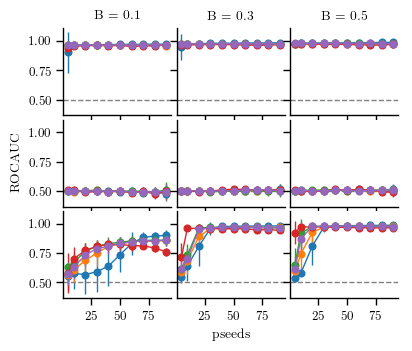

In [18]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_sampling(df_rq2, columns, fn=fn)

<h3>Quality of estimates</h3>

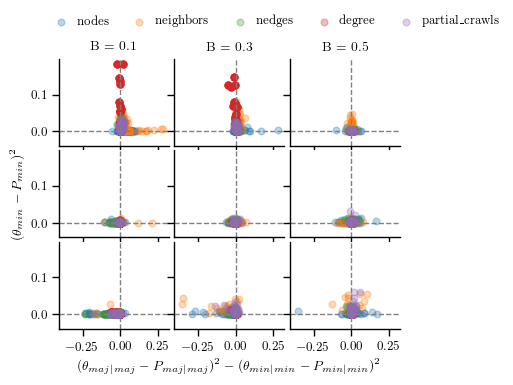

In [19]:
fn = None
viz.plot_MSEp1_vs_MSEcpDiff_per_H_B_sampling(df_rq2, columns, fn)

<h3>Utility of estimates</h3>

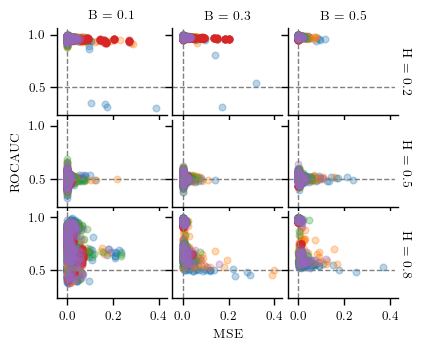

In [20]:
fn = None
viz.plot_rocauc_vs_MSE_per_H_B_sampling(df_rq2, columns, fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [21]:
df_rq3 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8] & pseeds < 0.4")
df_rq3.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,cp\_{00 g},cp\_{01 g},cp\_{10 g},cp\_{11 g},MSEp0,MSEp1,MSEcp00,MSEcp11,MSEcpDiff,MSE
202,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.508761,0.491239,0.535733,0.464267,0.003460,0.003460,0.002351,0.001793,0.000559,0.007604
203,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.508761,0.491239,0.535733,0.464267,0.003460,0.003460,0.002351,0.001793,0.000559,0.007604
204,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.30,...,0.508761,0.491239,0.535733,0.464267,0.001336,0.001336,0.001852,0.000045,0.001807,0.003232
205,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.20,...,0.508761,0.491239,0.535733,0.464267,0.001046,0.001046,0.001382,0.000731,0.000651,0.003159
207,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.508761,0.491239,0.535733,0.464267,0.003460,0.003460,0.002351,0.001793,0.000559,0.007604


<h3>Performance Bias</h3>

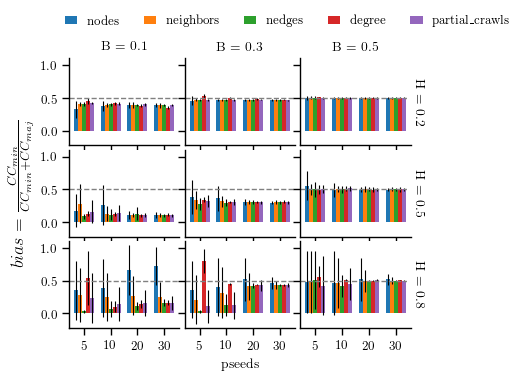

In [22]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)